In [1]:
import seaborn as sn
import matplotlib.pyplot as plt


In [2]:
import numpy as np
import pandas as pd

# On average each bootstrap sample contain roughly two thirds of observations

In [3]:
max_len = 5
a = range(1,max_len+1,1)

<AxesSubplot:>

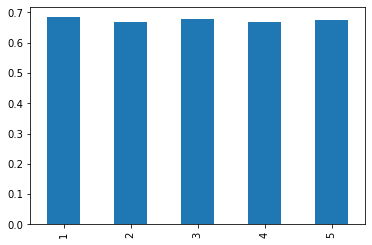

In [4]:
loop_counter = 1000
df = pd.DataFrame(data = None, columns=[str(x) for x in a])
for k in range(loop_counter):
    ls_1 = list(np.random.choice(a,max_len ))
    z = [True if x in ls_1 else False for x in a]
    df.loc[k] = z

pd.Series(df.apply(sum, axis = 0)/loop_counter).plot(kind = 'bar')

# CLT with Bootstrapping

In [5]:
## Normal CLT
norm_pop = np.random.normal(loc = 5, scale = 60, size = 100000)
## Generating a random array to pick up sample
clt_sample_means = list([])
sample_size = 10000
for i in range(1,500):
    random_sample = norm_pop[np.random.randint(0,100000,sample_size)]
    clt_sample_means.append(np.mean(random_sample))

## Bootstrapping
orignal_sample = norm_pop[np.random.randint(0,100000,sample_size)]
## Bootstrapping sample
bootstrapped_sample_mean = list([])

for i in range(1,500):
    bootstrapped_sample = np.random.choice(orignal_sample,sample_size)
    bootstrapped_sample_mean.append(np.mean(bootstrapped_sample))


Text(0.5, 1.0, 'Bootstrap Mean: 5.24')

<Figure size 720x1440 with 0 Axes>

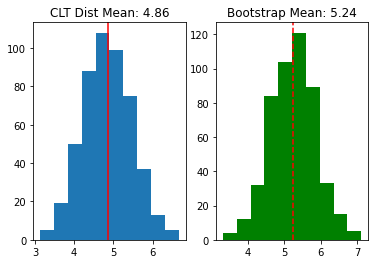

In [6]:
plt.figure(figsize = (10,20))
fig ,(ax1,ax2) = plt.subplots(1,2)

ax1.hist(clt_sample_means)
ax1.axvline(np.mean(clt_sample_means), color = 'red')
ax1.set_title("CLT Dist Mean: "  + str(round(np.mean(clt_sample_means),2)))

ax2.hist(bootstrapped_sample_mean, color = 'green')
ax2.axvline(np.mean(bootstrapped_sample_mean), color = 'red', linestyle = 'dashed')
ax2.set_title("Bootstrap Mean: "  + str(round(np.mean(bootstrapped_sample_mean),2)))

# Bootstrapping and Linear Regression

In [7]:
iris = sn.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
## Lets first fit sepal_length on sepal_width
import statsmodels.api as sm
df = iris.loc[:,['sepal_length','sepal_width', 'petal_length', 'petal_width']].copy()
df.head()
y = df['sepal_length']
x = sm.add_constant(df[['sepal_width']])

mod = sm.OLS(y,x)
results = mod.fit()
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.007   
Dependent Variable: sepal_length     AIC:                369.9917
Date:               2021-08-19 18:35 BIC:                376.0129
No. Observations:   150              Log-Likelihood:     -183.00 
Df Model:           1                F-statistic:        2.074   
Df Residuals:       148              Prob (F-statistic): 0.152   
R-squared:          0.014            Scale:              0.68078 
------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025  0.975]
------------------------------------------------------------------
const           6.5262    0.4789  13.6276  0.0000   5.5799  7.4726
sepal_width    -0.2234    0.1551  -1.4403  0.1519  -0.5298  0.0831
-----------------------------------------------------------------
Omnibus:              4.389        Durbin-Watson:           0.952
Prob(Omnibus):        0.111        Jarque-Bera (JB):        4.237
Skew:                 0.360        Prob(JB):                0.120
Kurtosis:             2.600        Condition No.:           24   
=================================================================

"""

In [11]:
## Now lets try to run the model using bootstrap
coeff = list([])
intercept = list([])
for x in range(5000):
    temp = df.sample(n = len(df),replace = True)
    y = temp['sepal_length']
    x = sm.add_constant(temp['sepal_width'])
    mod = sm.OLS(y,x)
    results = mod.fit()
    coeff.append(results.params[0])
    intercept.append(results.params[1])

In [12]:
print(np.mean(coeff)) 
print(np.var(coeff)**0.5)

print(np.mean(intercept)) 
print(np.var(intercept)**0.5)

6.540846875054778
0.4331445790506178
-0.2278104925194879
0.14229857848908378


# Non-Parametric Regression using bootstrapping 

In [13]:
## Let's load a dataset 
df = sn.load_dataset(name= 'iris')
## Idea is to regress Sepal length as a function of other three datapoints
var_names = df.columns
var_names

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [14]:
y = df[['sepal_length']]
x = df[['sepal_width']]

np.random.seed(0)
random_20 = np.random.choice(range(len(df)),20, replace = False)
test_y = y.loc[random_20,:]
test_x = x.loc[random_20,:]

train_y = y.drop(random_20, axis  =0)
train_x = x.drop(random_20, axis  =0)

for x in [train_x, train_y,  test_x, test_y]:
    print(x.shape)

(130, 1)
(130, 1)
(20, 1)
(20, 1)


Lets look at the regression for training data only 

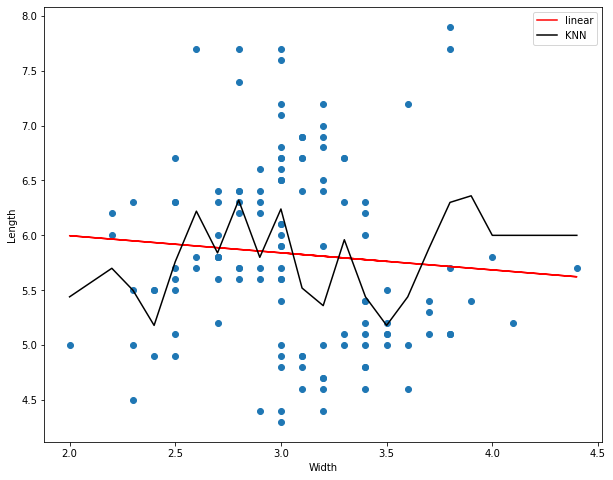

In [15]:
train_x = sm.add_constant(train_x)
test_x = sm.add_constant(test_x)
lin_mod = sm.OLS(train_y, train_x).fit()
pred = lin_mod.predict(train_x)

from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors= 5)
pred_knn  = knn_model.fit(train_x, train_y).predict(train_x).flatten()

###########################################################################
plt.figure(figsize = (10,8))
plt.scatter(y = train_y['sepal_length'], x = train_x['sepal_width'])
plt.xlabel('Width')
plt.ylabel('Length')
plt.plot(train_x['sepal_width'], pred, color = 'red' , label  = 'linear')
plt.plot(pd.Series(pred_knn, index=train_x['sepal_width']).sort_index(ascending=True), color = 'Black', label = 'KNN')
plt.legend()

In [16]:
## MSE for linear model on test
print("MSE Lineaar is :{:.2f}".format(sum((test_y['sepal_length'] - lin_mod.predict(test_x))**2)))

MSE Lineaar is :8.20


Bootstrapping and building KNN 

In [17]:
## Taking default dataset
y = df[['sepal_length']]
x = df[['sepal_width']]
y.sort_index(inplace = True)
x.sort_index(inplace = True)
length_ds = len(y)

bs_df = pd.merge(y,x,left_index=True, right_index=True)
bs_df.head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


# We can now provide a distribution for the predicted values of Y

In [18]:
count_bootstrap = 5000
op_df = pd.DataFrame(np.zeros([count_bootstrap, length_ds])*np.nan)
prediction_df = pd.DataFrame(data = [3.5], columns=['sepal_width'])
for x in range(count_bootstrap):
    bs = bs_df.sample(n = length_ds, replace = True)
    y_bs = bs[['sepal_length']]
    x_bs = bs[['sepal_width']]
    from sklearn.neighbors import KNeighborsRegressor
    knn_model = KNeighborsRegressor(n_neighbors= 10)
    pred_knn  = knn_model.fit(x_bs, y_bs).predict(prediction_df).flatten()
    #pred_knn
    op_df.iloc[x,:] = pred_knn

## Predicted values of Y 

mean is 5.223940000000015 and stdev is 0.13996783415813627


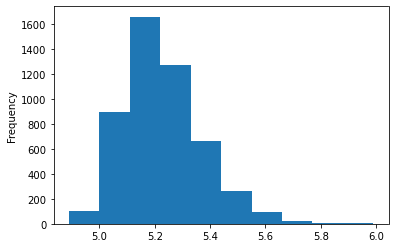

In [19]:
op_df.loc[:,0].plot(kind = 'hist')
print("mean is {a} and stdev is {b}".format(a = op_df.loc[:,0].mean(), b = op_df.loc[:,0].std()))

# KMeans Clustering 

In [20]:
iris


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


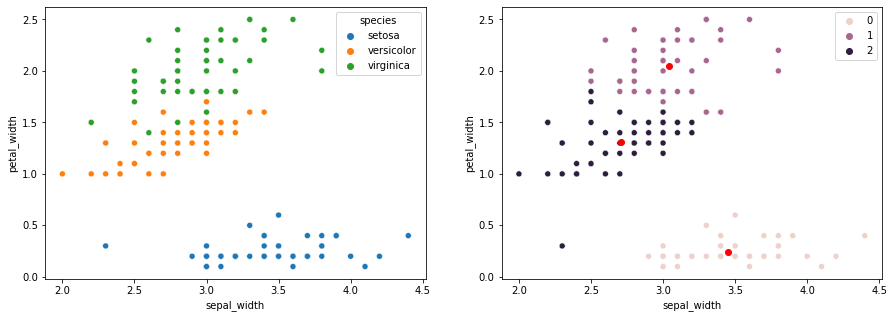

In [21]:
## Ideally, we will not be aware of the clusters, but here we are : Column - 'species'
## Lets just look at sepal_width and petal_width
## Now lets try to cluster them without knowing
from sklearn.cluster import KMeans
for pp in range(1):
    Kmeans_mod = KMeans(n_clusters=3, n_init=1 , init = 'random')
    Kmeans_mod.fit(iris[['sepal_width', 'petal_width']])

    plt.figure(figsize = (15,5))
    plt.subplot(1,2,1)
    sn.scatterplot(x = iris['sepal_width'], y = iris['petal_width'], hue = iris['species'])

    plt.subplot(1,2,2)
    sn.scatterplot(x = iris['sepal_width'], y = iris['petal_width'], hue = Kmeans_mod.labels_)
    #plt.plot(Kmeans_mod.cluster_centers_)
    for x in range(3):
        plt.plot(Kmeans_mod.cluster_centers_[x][0], Kmeans_mod.cluster_centers_[x][1], marker = 'o', color = 'red',)
    

# Best value of k 

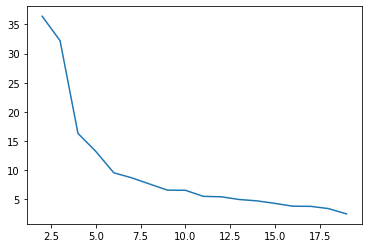

In [22]:
ssem = list([])
for cl in range(2,20):
    Kmeans_mod = KMeans(n_clusters=cl, n_init=1 , init = 'random')
    Kmeans_mod.fit(iris[['sepal_width', 'petal_width']])
    ssem.append(Kmeans_mod.inertia_)
plt.plot(range(2,20), ssem)

In [23]:
from sklearn.metrics import calinski_harabasz_score

for x in range(2,19):
    Kmeans_mod = KMeans(n_clusters=x, n_init=100 , init = 'random')
    Kmeans_mod.fit(iris[['sepal_width', 'petal_width']])
    print((calinski_harabasz_score(iris[['sepal_width', 'petal_width']],Kmeans_mod.labels_)), x)

318.96630686551885 2
336.3285325158111 3
299.12673215875805 4
298.9633315518926 5
323.1623318690709 6
317.3424109200964 7
312.63822056261523 8
321.7861725158903 9
313.4780989605993 10
315.8717257621367 11
304.14502332138534 12
313.5005503402142 13
309.18078947130203 14
312.62774044903995 15
339.49067907203244 16
328.3488342317223 17
340.22031806792296 18


# Hierarchical Clustering

In [154]:
np.array(np.mat('0.2 0 ; 0 0.2'),dtype = 'float')

array([[0.2, 0. ],
       [0. , 0.2]])

Text(0.5, 1.0, '2 Pre-Defined Classes')

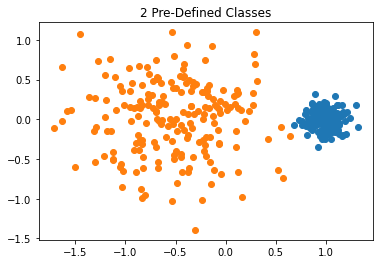

In [203]:
sz = 200
mg1 = np.random.multivariate_normal(mean = [1,0],cov = np.array(np.mat('0.01 0 ; 0 0.01'),dtype = 'float'), size = sz)
x1 = [mg1[x][0] for x in range(sz)]
x2 = [mg1[x][1] for x in range(sz)]

mg2 = np.random.multivariate_normal(mean = [-0.5,0],cov = np.array(np.mat('0.2025 0 ; 0 0.2025'),dtype = 'float'), size = sz)
x1s = [mg2[x][0] for x in range(sz)]
x2s = [mg2[x][1] for x in range(sz)]

plt.scatter(x1,x2)
plt.scatter(x1s,x2s)
plt.title("2 Pre-Defined Classes")

In [204]:
df = pd.concat([pd.DataFrame(mg1,columns = ['v1','v2']),pd.DataFrame(mg2, index = range((sz+1),(2*sz+1)), columns = ['v1','v2'])], axis = 0)
print(df.shape)
df.head()

(400, 2)


,v1,v2
0,0.764531,-0.068441
1,1.072875,0.059600
2,1.078412,-0.055755
3,1.213177,0.088908
4,0.992043,-0.097031


## Lets import the hierarchial clustering library 

In [205]:
from sklearn.cluster import AgglomerativeClustering
mod_ins = AgglomerativeClustering(n_clusters=  2, linkage='complete').fit(df)
df['max_linkage'] = mod_ins.labels_

mod_ins = AgglomerativeClustering(n_clusters=  2, linkage='single').fit(df)
df['min_linkage'] = mod_ins.labels_


mod_ins = AgglomerativeClustering(n_clusters=  2, linkage='average').fit(df)
df['avg_linkage'] = mod_ins.labels_

df.head()

,v1,v2,max_linkage,min_linkage,avg_linkage
0,0.764531,-0.068441,1,0,1
1,1.072875,0.059600,1,0,1
2,1.078412,-0.055755,1,0,1
3,1.213177,0.088908,1,0,1
4,0.992043,-0.097031,1,0,1


Text(0.5, 1.0, 'Avg Linkage')

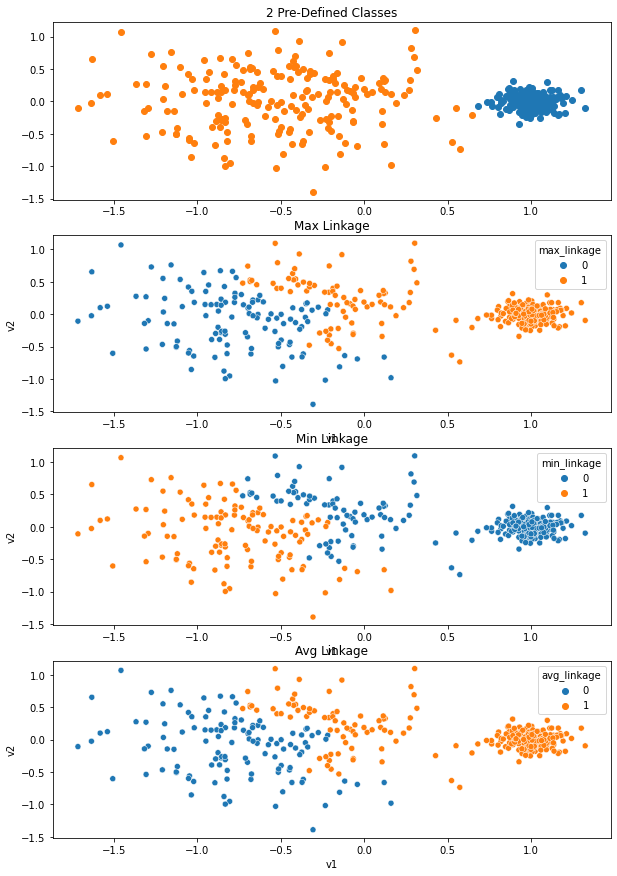

In [206]:
plt.figure(figsize = (10,15))
plt.subplot(4,1,1)
plt.scatter(x1,x2)
plt.scatter(x1s,x2s)
plt.title("2 Pre-Defined Classes")

plt.subplot(4,1,2)
sn.scatterplot(x = 'v1',y = 'v2', hue = 'max_linkage', data = df)
#plt.scatter(x1s,x2s)
plt.title("Max Linkage")

plt.subplot(4,1,3)
sn.scatterplot(x = 'v1',y = 'v2', hue = 'min_linkage', data = df)
#plt.scatter(x1s,x2s)
plt.title("Min Linkage")

plt.subplot(4,1,4)
sn.scatterplot(x = 'v1',y = 'v2', hue = 'avg_linkage', data = df)
#plt.scatter(x1s,x2s)
plt.title("Avg Linkage")


In [207]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,counts]).astype(float)       
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

Text(0.5, 1.0, 'Last P')

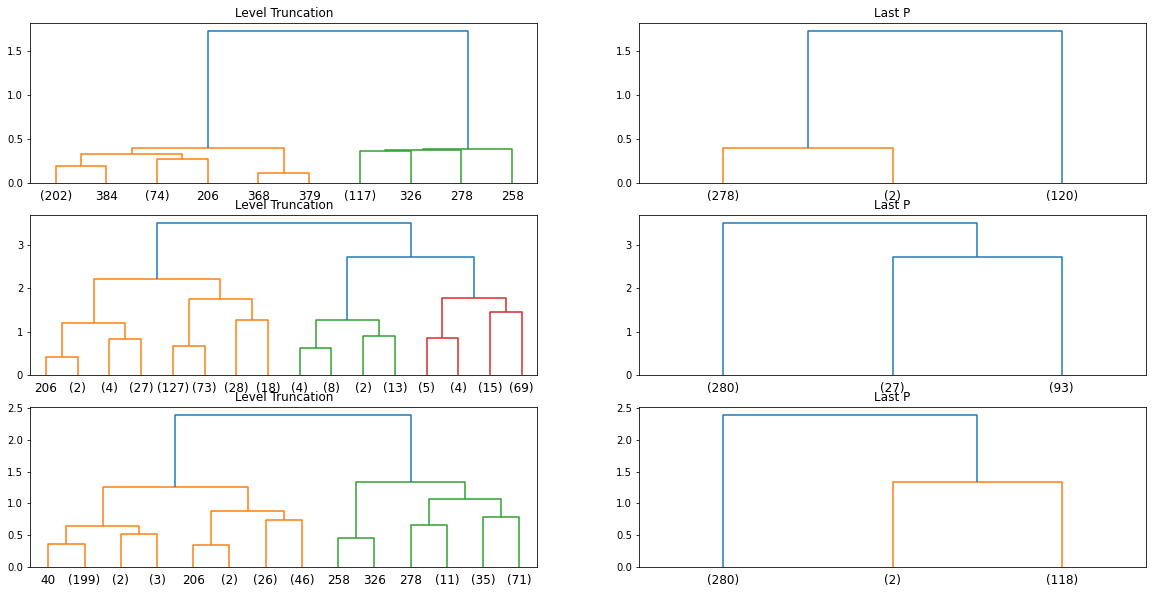

In [210]:
input_p = 3

plt.figure(figsize = (20,10))

dend_mod = AgglomerativeClustering(n_clusters=  None, linkage='single',distance_threshold=0).fit(df)
plt.subplot(3,2,1)
plot_dendrogram(dend_mod,truncate_mode='level', p = input_p)
plt.title("Level Truncation")

plt.subplot(3,2,2)
plot_dendrogram(dend_mod,truncate_mode='lastp', p = input_p)
plt.title("Last P")

dend_mod = AgglomerativeClustering(n_clusters=  None, linkage='complete',distance_threshold=0).fit(df)
plt.subplot(3,2,3)
plot_dendrogram(dend_mod,truncate_mode='level', p = input_p)
plt.title("Level Truncation")

plt.subplot(3,2,4)
plot_dendrogram(dend_mod,truncate_mode='lastp', p = input_p)
plt.title("Last P")

dend_mod = AgglomerativeClustering(n_clusters=  None, linkage='average',distance_threshold=0).fit(df)

plt.subplot(3,2,5)
plot_dendrogram(dend_mod,truncate_mode='level', p = input_p)
plt.title("Level Truncation")

plt.subplot(3,2,6)
plot_dendrogram(dend_mod,truncate_mode='lastp', p = input_p)
plt.title("Last P")



# Cars Data for hierarchical clustering 

In [213]:
loc = r'C:\Users\arora\Documents\UT\Introduction to Machine Learning\Intro-to-ML-Part-2\STA380\data\\'
df = pd.read_csv(loc+'cars.csv')
df.head()

,Sports,SUV,Wagon,Minivan,Pickup,AWD,RWD,Retail,Dealer,Engine,Cylinders,Horsepower,CityMPG,HighwayMPG,Weight,Wheelbase,Length,Width
Acura 3.5 RL,0,0,0,0,0,0,0,43755,39014,3.5,6,225,18,24,3880,115,197,72
Acura 3.5 RL Navigation,0,0,0,0,0,0,0,46100,41100,3.5,6,225,18,24,3893,115,197,72
Acura MDX,0,1,0,0,0,1,0,36945,33337,3.5,6,265,17,23,4451,106,189,77
Acura NSX S,1,0,0,0,0,0,1,89765,79978,3.2,6,290,17,24,3153,100,174,71
Acura RSX,0,0,0,0,0,0,0,23820,21761,2.0,4,200,24,31,2778,101,172,68


In [241]:
dend_mod = AgglomerativeClustering(n_clusters=  5, linkage='single').fit(df)
#plot_dendrogram(dend_mod,truncate_mode=None)
#plt.title("Last P")
df['clust'] = dend_mod.labels_
df.loc[df['clust']==3,:].index

Index(['Porsche 911 GT2'], dtype='object')

# Principal Component Analysis 

An easiest way to analyze the principal component Analysis is by creating a bunch of points in 3 dimensions but make sure that they actually lie on a plane


In [1145]:
# define 1M points at random:
np.random.seed(0)
p = np.random.randint(-100,100, size=(1000000,3))

# A,B,C (c0) are arbitrary values; define D so plane intersects first point:    
c0 = np.array([3,5,7])
D = 5

# return all points in plane Ax + By + Cz + D = 0
p_in_plane = p[p.dot(c0) + D == 0]
len(p_in_plane)

705

In [1153]:
plane_points_intd  = pd.DataFrame(p_in_plane,columns=['v1','v2','v3'])
plane_points_intd.head()

,v1,v2,v3
0,-15,71,-45
1,-80,54,-5
2,13,-62,38
3,-10,75,-50
4,-90,25,20


In [1154]:
## Let's standardize these points
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(plane_points_intd)
plane_points = std.transform(plane_points_intd)
plane_points = pd.DataFrame(plane_points,columns=['v1','v2','v3'])
plane_points.head()

,v1,v2,v3
0,-0.273662,1.167634,-0.888095
1,-1.417561,0.869976,-0.021001
2,0.219094,-1.161103,0.911126
3,-0.185670,1.237672,-0.996482
4,-1.593546,0.362207,0.520933


We can't visualize these in two dimensions but lets see 

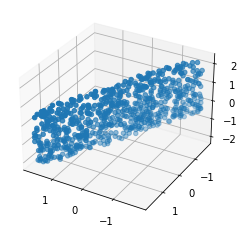

In [1217]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(30,120)
ax.scatter3D(xs=plane_points['v1'], ys=plane_points['v1'], zs=plane_points['v3'])
#sn.scatterplot(x = 'V2', y = 'V1', data = combined_df)

In [1192]:
from sklearn.decomposition import PCA
pca_mod1 = PCA(n_components=2)
pca_mod1.fit(plane_points)
pca_mod1.components_

#pca_mod1.explained_variance_ratio_

array([[-0.31383867, -0.6229398 ,  0.71655516],
       [-0.87536768,  0.48213422,  0.03574932]])

In [1193]:
#Lets see if these 2 PCs are orthagonal or not : Orthogonal means dot product = 0
## Magnitude of vector
import math
print(np.linalg.norm(pca_mod1.components_[0]))
print(np.linalg.norm(pca_mod1.components_[1]))
## These are unit vectors
## Lets see what is the angle between these two vectors
print(np. arccos(np.dot(pca_mod1.components_[0], pca_mod1.components_[1]))*180/math.pi)
#Angle between these two vectors is 90 degree

1.0
1.0
90.00000000000001


In [1194]:
## Lets create a normal to these two vectors.
p_in_plane = np.array(plane_points)
rnd_pnts = np.random.randint(0, len(p_in_plane),3)
AB = p_in_plane[rnd_pnts[1]] - p_in_plane[rnd_pnts[0]]
AC = p_in_plane[rnd_pnts[2]] - p_in_plane[rnd_pnts[0]]
norma_vector = np.cross(AB, AC)/np.linalg.norm(np.cross(AB, AC))
n = np.cross(pca_mod1.components_[0], pca_mod1.components_[1])
np.arcsin(np.linalg.norm(np.cross(norma_vector,n)))*180/math.pi

2.3641172274621175e-14

<B> Principal component actually took these two components and  created an axis depicting the plane </B>

In [1195]:
scores_df = pd.DataFrame(np.matmul(np.array(plane_points), pca_mod1.components_.T))

In [1197]:
combined_df = pd.concat([scores_df, plane_points], axis = 1, ignore_index=True)
combined_df.columns = ['PC1','PC2','V1','V2','V3']
combined_df.head()

,PC1,PC2,V1,V2,V3
0,-1.277850,0.770763,-0.273662,1.167634,-0.888095
1,-0.112106,1.659582,-1.417561,0.869976,-0.021001
2,1.307409,-0.719023,0.219094,-1.161103,0.911126
3,-1.426759,0.723630,-0.185670,1.237672,-0.996482
4,0.647761,1.588194,-1.593546,0.362207,0.520933


<AxesSubplot:>

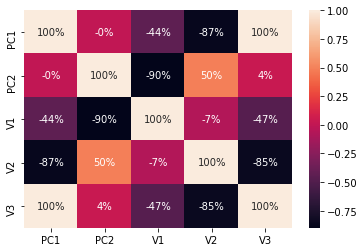

In [1198]:
sn.heatmap(combined_df.corr(), annot = True, fmt='0.00%')

We can see that each principal component is explaining different variables. PC1 is 100% correlated with V3 and ~90% with V2. 

Also, PC2 is mutually exclusive (orthagonality) as it tries to link more to variable V1